In [1]:
from visualizations import *
from simulations import *
from geolocations import *


In [2]:
geo_df = get_county_mapping_data(county = "Montgomery", state = "AL")
geo_df

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


,county,state,area (km^2),population (2019),density,geometry,strongly_hesitant,hesitant_or_unsure,not_hesitant
0,Montgomery,AL,2069.802607,226486,109.423961,"POLYGON ((-9628972.358 3808019.131, -9628957.0...",0.1135,0.2123,0.6742


In [3]:
not_hesitant = geo_df.loc[0,"not_hesitant"]
hesitant_or_unsure = geo_df.loc[0,"hesitant_or_unsure"]
strongly_hesitant = geo_df.loc[0,"strongly_hesitant"]

model = OpinionNetworkModel(n_modes = 3, 
                            probabilities = [not_hesitant,
                                             hesitant_or_unsure,
                                             strongly_hesitant]
                           )

model.populate_model(num_agents = 100, geo_df = geo_df)

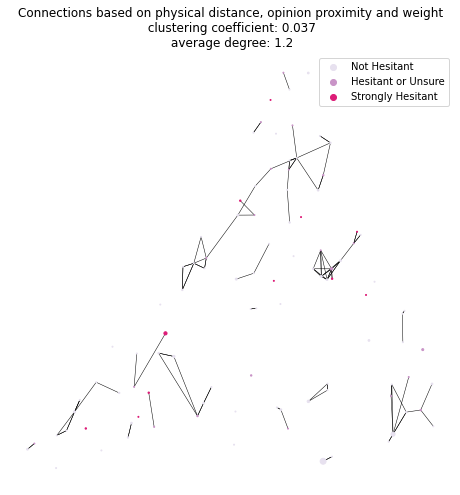

In [4]:
model.plot_initial_network()

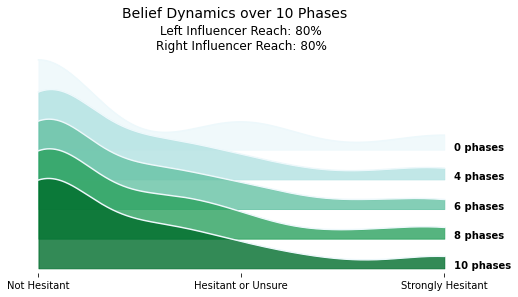

In [7]:
sim = NetworkSimulation()
sim.run_simulation(model = model, phases = 10)
sim.plot_simulation_results()

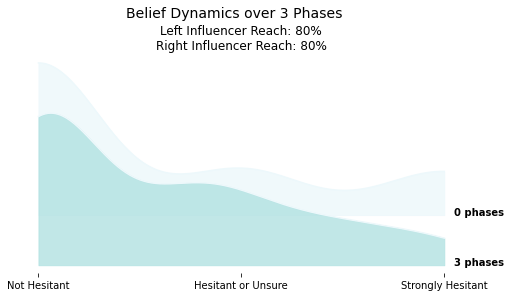

In [8]:
get_ridge_plot(sim.dynamic_belief_df, [0,3], reach_dict = {0:.8, 2:.8})

In [10]:
t = sim.phases // 5

plot_phases = [0] + [t * (i+1) for i in range(1,5)]
plot_phases

[0, 0, 0, 0, 0]

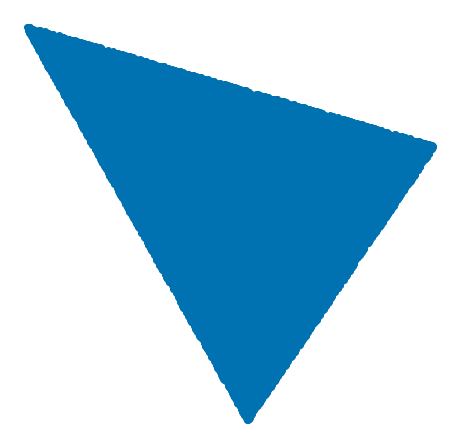

In [30]:
s = "al"
c = "montgomery"
with open('../data/{}/{}/triangulation_dict.geojson'.format(s,c)) as f:
    tri_dict = geojson.load(f)

T = np.array([Polygon(t).area for t in tri_dict["geometry"]["coordinates"]])
triangle_object = Polygon(tri_dict["geometry"]["coordinates"][T.argmax()])
        
def plot_agents_on_triangle(triangle_object, agents):
    """ Returns triangle filled with agents.

    Inputs: 
        triangle_object : (polygon) shapely triangle object.
        agents: (dataframe) x,y coordinates for agents.

    Outputs: 
        Plot of points on triangle.
    """
    fig, ax = plt.subplots(figsize = (8,8))
    df = gpd.GeoDataFrame({"geometry": triangle_object}, index = [0])
    df.boundary.plot(ax = ax, alpha=1, edgecolor = COLORS["light_blue"])
    ax.scatter(agents["x"], agents["y"], color = COLORS["dark_blue"], zorder = 0)
    ax.set_axis_off()
    
    return None

plot_agents_on_triangle(triangle_object = None, agents = agents)

In [26]:
# Select largest triangle.
T = np.array([Polygon(t).area for t in tri_dict["geometry"]["coordinates"]])
triangle_object = tri_dict["geometry"]["coordinates"][T.argmax()]
lon, lat = zip(*triangle_object)
pa = Proj(
    "+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")
x, y = pa(lon, lat)
coord_proj = {"type": "Polygon", "coordinates": [zip(x, y)]}
area = shape(coord_proj).area # area in km^2
x

(inf, inf, inf, inf)

In [31]:
lon, lat = zip(*geo.raw["geojson"]["coordinates"][0])
from pyproj import Proj
pa = Proj("+proj=aea +lat_1=37.0 +lat_2=41.0 +lat_0=39.0 +lon_0=-106.55")

x, y = pa(lon, lat)
cop = {"type": "Polygon", "coordinates": [zip(x, y)]}
from shapely.geometry import shape
shape(cop).area/(10**6)

1204.1494060006294

In [5]:
OpinionNetworkModel.initialize(
                    point_df = None,
                    state = None, 
                    county = None, 
                    num_points = None, 
                    n_modes = 3, 
                    probabilities = [.45,.1,.45],
                    power_law_exponent = 2.5,
                    openmindedness = 1.5,
                    alpha = 1.6, 
                    beta = 3, 
                    include_opinion = True, 
                    include_weight = True,
                    reach_dict = {0:.8, 2:.8},
                    left_openmindedness = 1.5,
                    right_openminde
)

KeyboardInterrupt: 

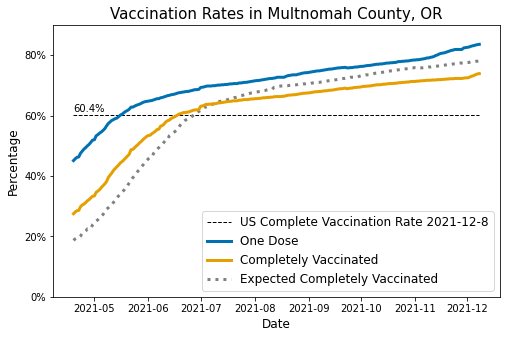

In [3]:
vaccine_trends_plot(county = "Multnomah", state = "OR", show_us_current = True)

In [2]:
nm = OpinionNetworkModel.initialize(num_points = 500)
d = nm.__dict__

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


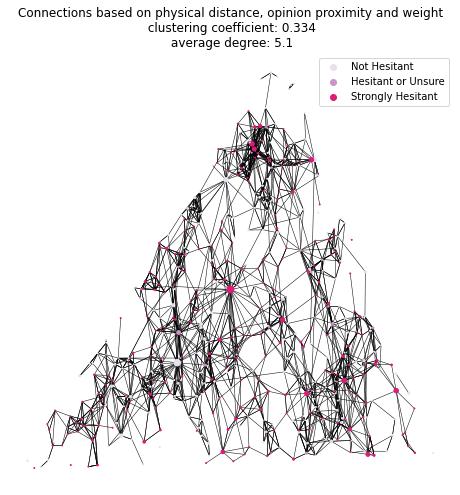

In [3]:
plot_initial_networks(nm)

In [4]:
sim = NetworkSimulation()
sim.run_simulation(model = nm, phases = 60)

df = sim.dynamic_belief_df

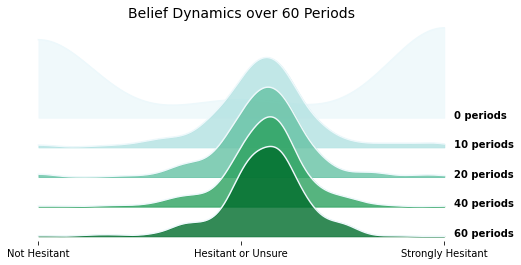

In [5]:
get_ridge_plot(df, periods = [0,10,20,40,60])
    

In [3]:
one_dynamics_iteration(belief_df, 
            adjacency_df, 
            mega_influencer_df
            )

,x,y,weight,belief,decile
0,11.801607,14.350163,1.586048,2.000000,46
1,-7.908970,7.249932,1.002764,2.000000,1
2,-3.858598,-1.656434,1.455536,0.900000,39
3,1.846529,3.471116,1.657043,0.200000,49
4,5.391548,7.853978,1.864402,2.000000,58
...,...,...,...,...,...
495,0.849332,4.017014,1.175722,0.222222,21
496,-4.286927,10.299521,1.072079,0.000000,11
497,5.099458,15.638707,1.699724,2.000000,51
498,4.857291,11.213181,1.955563,0.000000,61


In [48]:
density * (530833043.467798 * 10e-7)

41404.977390488246

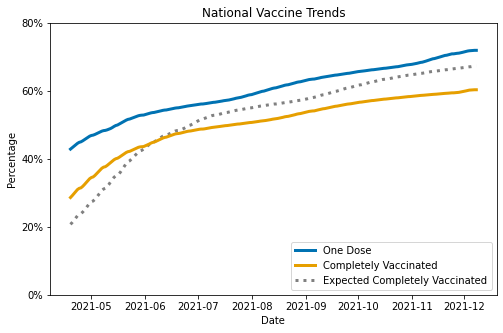

In [2]:
national_vaccine_trends_chart()

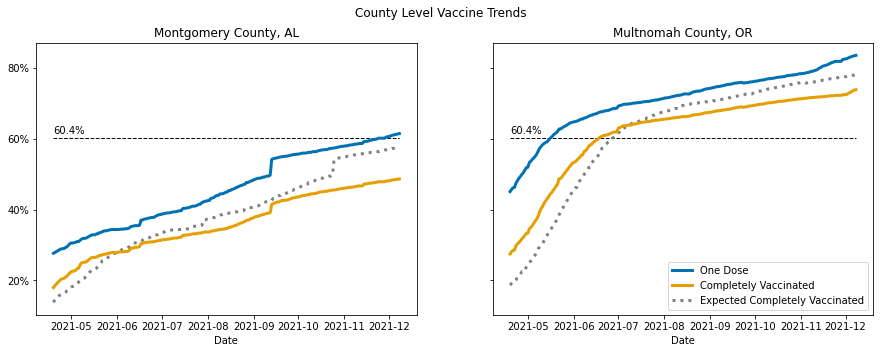

In [5]:
county_vaccine_trends_chart(download_data = False)

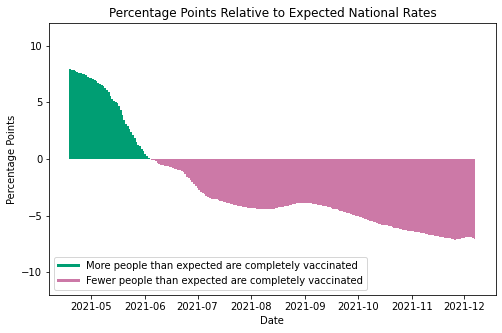

In [4]:
national_vaccine_expectation_chart()

In [5]:
diff = complete - expected
diff_weekly = pd.DataFrame(index = pd.date_range(diff.index[0],diff.index[-1], freq = "W"),
                             columns = ["mean"])

for i in range(diff.shape[0]-1):
        start = diff.index[i]
        end = diff.index[i+1]
        diff_weekly.loc[start,'mean'] = diff.loc[start:end].mean()

diff_weekly

NameError: name 'complete' is not defined

In [40]:
def load_county_data(county, state, download = False):
    c = county.lower()
    s = state.lower()
    
    if download == True:
        # Caution: this will take a long time.
        df = pd.read_csv("https://data.cdc.gov/api/views/8xkx-amqh/rows.csv?accessType=DOWNLOAD")
        df = df[(df["Recip_County"] == "{} County".format(county.capitalize())) & (df["Recip_State"] == state.upper())]

    else:
        df = pd.read_csv("../data/{}_county_{}_vaccination_trends.csv".format(c,s), index_col = 0)
    
    df["Date"] = [pd.to_datetime(d) for d in df["Date"]]
    df.sort_values(by = "Date", inplace = True)
    df.set_index("Date", drop = True, inplace = True)
    
    return df
        
df = load_county_data(county = "Multnomah", state= "OR", download = False)

In [46]:
df.columns

Index(['FIPS', 'MMWR_week', 'Recip_County', 'Recip_State',
       'Series_Complete_Pop_Pct', 'Series_Complete_Yes',
       'Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct',
       'Series_Complete_18Plus', 'Series_Complete_18PlusPop_Pct',
       'Series_Complete_65Plus', 'Series_Complete_65PlusPop_Pct',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'SVI_CTGY',
       'Series_Complete_Pop_Pct_SVI', 'Series_Complete_12PlusPop_Pct_SVI',
       'Series_Complete_18PlusPop_Pct_SVI',
       'Series_Complete_65PlusPop_Pct_SVI', 'Metro_status',
       'Series_Complete_Pop_Pct_UR_Equity',
       'Series_Complete_12PlusPop_Pct_UR_Equity',
       'Series_Complete_18PlusPop_Pct_UR_Eq

In [55]:
def county_complete_pct(df):
    """ Returns timeseries of percentage completely vaccinated.
    """
    return df["Series_Complete_Pop_Pct"].loc[START_DATE:,]

def county_one_dose_pct(df):
    """ Returns timeseries of percentage with one dose.
    """
    return df['Administered_Dose1_Pop_Pct'].loc[START_DATE:,]

def county_expected_complete_pct(df):
    """ Returns timeseries of percentage expected completely vaccinated.
    """
    one_dose = df['Administered_Dose1_Pop_Pct']
    expected = one_dose.loc[START_DATE - timedelta(days = 42):one_dose.index[-1] - timedelta(days = 42)]
    expected = pd.Series(expected.values, index = pd.date_range(START_DATE, one_dose.index[-1]))
    
    return expected
county_expected_complete_pct(df)

2021-04-19    18.7
2021-04-20    19.2
2021-04-21    19.6
2021-04-22    19.6
2021-04-23    20.1
              ... 
2021-12-04    77.9
2021-12-05    77.9
2021-12-06    78.0
2021-12-07    78.0
2021-12-08    78.1
Freq: D, Length: 234, dtype: float64

In [16]:
df_us["Date"]

KeyError: 'Date'